
## Linear Regression with Python


In [1]:
import numpy as np

X = np.array([[1], [2], [3], [4], [5]])  # Independent variable
y = np.array([2, 4, 6, 8, 10])  # Dependent variable

In [2]:
from sklearn.linear_model import LinearRegression


# Create a linear regression model
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, 
                         positive=False)

# Fit the model to the data
model.fit(X, y)

# Make predictions
new_X = np.array([[3], [7], [8]])  # New data points to predict
predictions = model.predict(new_X)

# Print the predictions
print(predictions)


[ 6. 14. 16.]


### Step 1: Gather the data

For understand the linear regression we are taking dataset of USA_Housing.csv.

The data contains the following columns:

**'Avg. Area Income'**: Avg. Income of residents of the city house is located in.

**'Avg. Area House Age'**: Avg Age of Houses in same city

**'Avg. Area Number of Rooms'**: Avg Number of Rooms for Houses in same city

**'Avg. Area Number of Bedrooms'**: Avg Number of Bedrooms for Houses in same city

**'Area Population'**: Population of city house is located in

**'Price'**: Price that the house sold at

**'Address'**: Address for the house


### Step 2: Import Libraries and Read the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
housing = pd.read_csv('USA_Housing.csv')

In [5]:
housing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 254.0+ KB


In [7]:
housing.describe().T

count          mean            std  \
Avg. Area Income              5000.0  6.858311e+04   10657.991214   
Avg. Area House Age           5000.0  5.977222e+00       0.991456   
Avg. Area Number of Rooms     5000.0  6.987792e+00       1.005833   
Avg. Area Number of Bedrooms  5000.0  3.981330e+00       1.234137   
Area Population               5000.0  3.616352e+04    9925.650114   
Price                         5000.0  1.232073e+06  353117.626581   

                                       min            25%           50%  \
Avg. Area Income              17796.631190   61480.562388  6.880429e+04   
Avg. Area House Age               2.644304       5.322283  5.970429e+00   
Avg. Area Number of Rooms         3.236194       6.299250  7.002902e+00   
Avg. Area Number of Bedrooms      2.000000       3.140000  4.050000e+00   
Area Population                 172.610686   29403.928702  3.619941e+04   
Price                         15938.657923  997577.135049  1.232669e+06   

                                       75%           max  
Avg. Area Income              7.578334e+04  1.077017e+05  
Avg. Area House Age           6.650808e+00  9.519088e+00  
Avg. Area Number of Rooms     7.665871e+00  1.075959e+01  
Avg. Area Number of Bedrooms  4.490000e+00  6.500000e+00  
Area Population               4.286129e+04  6.962171e+04  
Price                         1.471210e+06  2.469066e+06

In [8]:
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
# Data Claening
df = pd.DataFrame()

df['Income'] = housing['Avg. Area Income'].round(2)
df['HouseAge'] = housing['Avg. Area House Age'].apply(int)
df['NumberRooms'] = housing['Avg. Area Number of Rooms'].apply(int)
df['NumberBedrooms'] = housing['Avg. Area Number of Bedrooms'].apply(int)
df['Population'] = housing['Area Population'].apply(int)
df['Price'] = housing['Price'].apply(int)

df.head(1)

Income  HouseAge  NumberRooms  NumberBedrooms  Population    Price
0  79545.46         5            7               4       23086  1059033

## Exploratory Data Analysis

EDA is the process of examining and analyzing data to uncover patterns, relationships, and anomalies.

In [10]:
plt.style.use('dark_background')

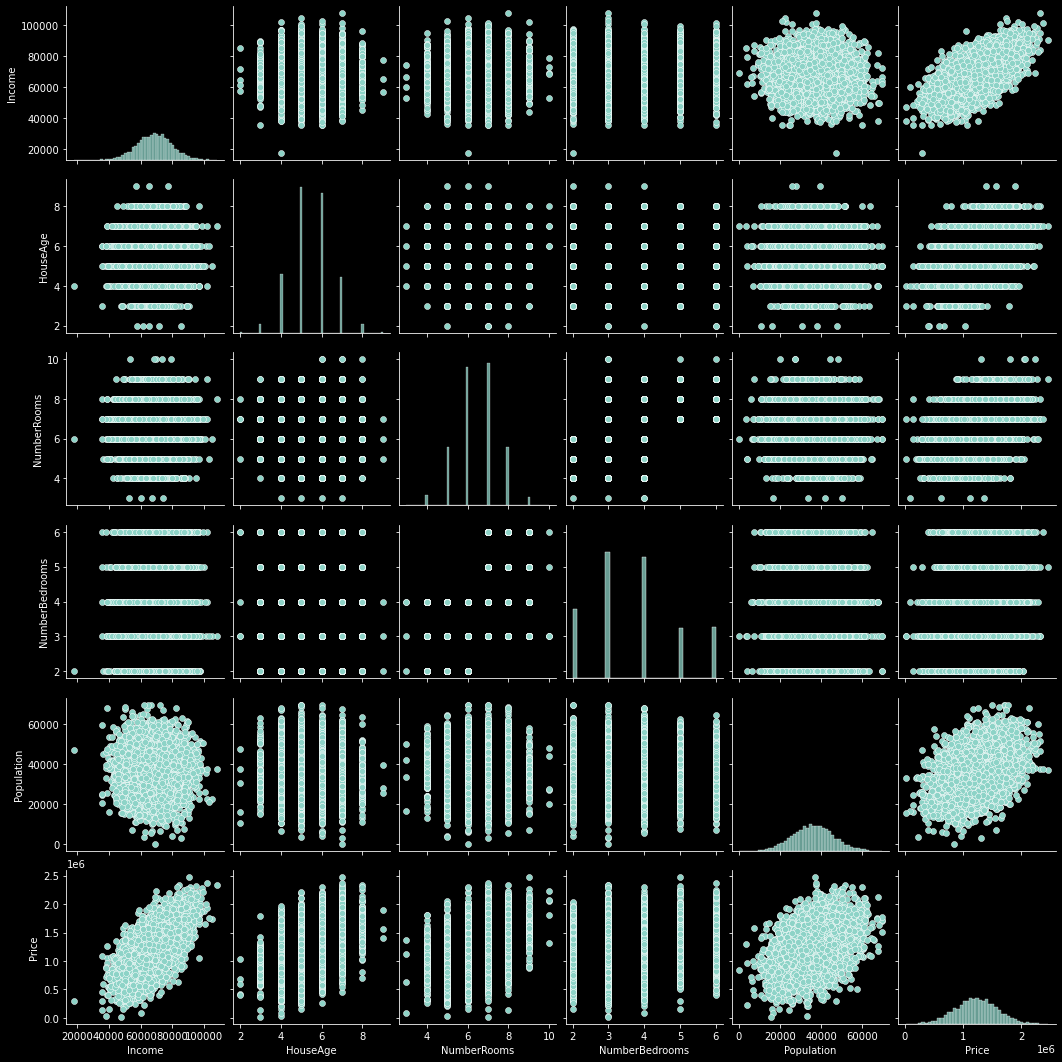

In [11]:
sns.pairplot(df)

<AxesSubplot:xlabel='Price', ylabel='Count'>

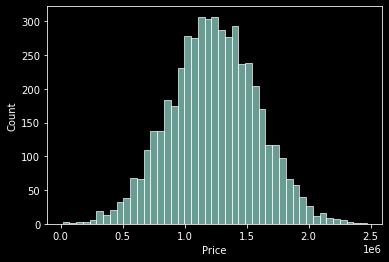

In [12]:
sns.histplot(df['Price'])

<AxesSubplot:xlabel='HouseAge', ylabel='Price'>

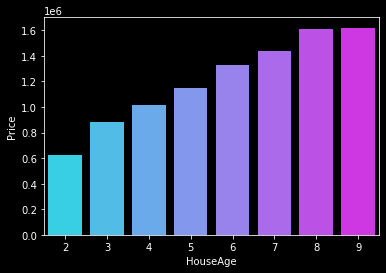

In [13]:
sns.barplot(x = 'HouseAge', y = 'Price', data = df, palette = 'cool', ci = None)

<AxesSubplot:>

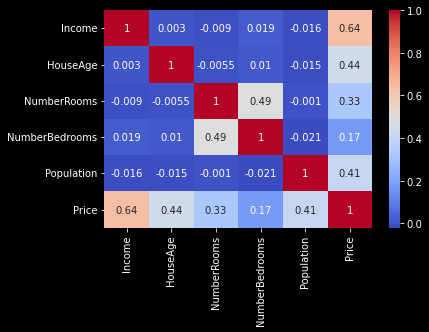

In [14]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

### Step 3: Divide the dataset into Dependent & Independent variable

In [15]:
df.head()

Income  HouseAge  NumberRooms  NumberBedrooms  Population    Price
0  79545.46         5            7               4       23086  1059033
1  79248.64         6            6               3       40173  1505890
2  61287.07         5            8               5       36882  1058987
3  63345.24         7            5               3       34310  1260616
4  59982.20         5            7               4       26354   630943

In [16]:
X = df[['Income', 'HouseAge', 'NumberRooms',
               'NumberBedrooms', 'Population']]
X

Income  HouseAge  NumberRooms  NumberBedrooms  Population
0     79545.46         5            7               4       23086
1     79248.64         6            6               3       40173
2     61287.07         5            8               5       36882
3     63345.24         7            5               3       34310
4     59982.20         5            7               4       26354
...        ...       ...          ...             ...         ...
4995  60567.94         7            6               3       22837
4996  78491.28         6            6               4       25616
4997  63390.69         7            4               2       33266
4998  68001.33         5            7               5       42625
4999  65510.58         5            6               4       46501

[5000 rows x 5 columns]

In [17]:
Y = df[['Price']]
Y

Price
0     1059033
1     1505890
2     1058987
3     1260616
4      630943
...       ...
4995  1060193
4996  1482617
4997  1030729
4998  1198656
4999  1298950

[5000 rows x 1 columns]

### Step 4: Handle Missing Data

In [18]:
X.isna().sum()

Income            0
HouseAge          0
NumberRooms       0
NumberBedrooms    0
Population        0
dtype: int64

In [19]:
Y.isna().sum()

Price    0
dtype: int64

### Step 5: Check for Categorical Data


There is no any column which contains the categorical value. All the columns in X or in Y is numeric

### Step 6. Split the dataset into Training Set and Test Set

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.4, 
                                                    random_state=101)

In [22]:
# Print the shape of the dataset
print ('X_train:', X_train.shape)
print ('----------------')
print ('X_test:' ,X_test.shape)
print ('----------------')
print ('Y_train:', Y_train.shape)
print ('----------------')
print ('Y_test:', Y_test.shape)
print ('----------------')

X_train: (3000, 5)
----------------
X_test: (2000, 5)
----------------
Y_train: (3000, 1)
----------------
Y_test: (2000, 1)
----------------


### Step 7: Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# We need to fit and transform the training set
X_train = ss.fit_transform(X_train)

# We need to fit the test set
X_test = ss.transform(X_test)

In [24]:
X_test

array([[-0.15454969, -0.4732103 ,  0.49665393,  0.22438391,  0.06570086],
       [-0.5887083 , -1.45361837,  0.49665393,  1.85626686, -1.01427261],
       [ 0.49502082,  0.50719778,  1.46228048, -0.59155757,  0.7032659 ],
       ...,
       [-1.86065801, -0.4732103 , -0.46897263, -1.40749905, -1.64803069],
       [-0.31471074, -0.4732103 ,  2.42790704,  1.04032538,  0.14644841],
       [-0.23071277,  1.48760585,  1.46228048,  0.22438391,  2.56867461]])

## Now apply Linear Regression Model of Machine Learning

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train,Y_train)

LinearRegression()

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [28]:
predictions = lm.predict(X_test)

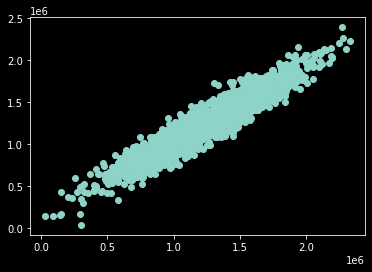

In [29]:
plt.scatter(Y_test,predictions)

In [30]:
X_test

array([[-0.15454969, -0.4732103 ,  0.49665393,  0.22438391,  0.06570086],
       [-0.5887083 , -1.45361837,  0.49665393,  1.85626686, -1.01427261],
       [ 0.49502082,  0.50719778,  1.46228048, -0.59155757,  0.7032659 ],
       ...,
       [-1.86065801, -0.4732103 , -0.46897263, -1.40749905, -1.64803069],
       [-0.31471074, -0.4732103 ,  2.42790704,  1.04032538,  0.14644841],
       [-0.23071277,  1.48760585,  1.46228048,  0.22438391,  2.56867461]])

In [31]:
Y_test

Price
1718  1251688
2511   873048
345   1696977
2521  1063964
54     948788
...       ...
1776  1489520
4269   777733
1661   151527
2410  1343824
2302  1906024

[2000 rows x 1 columns]

In [32]:
user = [[-0.15454969, -0.4732103 ,  0.49665393,  0.22438391,  0.06570086]]

In [33]:
result = lm.predict(user)
result

array([[1189345.73021615]])

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [34]:
# print the intercept
print(lm.intercept_)

[1228449.82433333]


In [35]:
print(lm.coef_)

[[226104.17255545 153487.80499763 116622.60921396   2216.09486242
  153025.58726183]]


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) It measures the average absolute difference between the predicted and actual values of the target variable. The lower the MAE value, the better the performance of the model:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is a commonly used metric to evaluate the performance of a regression model. It measures the average squared difference between the predicted and actual values of the target variable. The lower the MSE value, the better the performance of the model.:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In linear regression, accuracy is typically measured using the coefficient of determination, also known as **R-squared (R²)**. R-squared measures the proportion of variance in the dependent variable that is explained by the independent variable(s) in the regression model.

All of these are **loss functions**, because we want to minimize them.

In [36]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [37]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('R2:', r2_score(Y_test,predictions))

MAE: 93961.37681224405
MSE: 13811535249.775242
RMSE: 117522.48827256527
R2: 0.8913166208965877
